# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import patsy
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
tips = pd.read_csv('Gorjeta.csv').drop('Unnamed: 0', axis=1)
tips.head(n=5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Agora vamos usar o Patsy para criar as matrizes de design
y, X = patsy.dmatrices('tip ~ sex + smoker + day + net_bill', tips)

# Convertendo as matrizes de design para DataFrames (opcional)
X_df = pd.DataFrame(X, columns=X.design_info.column_names)
y_df = pd.DataFrame(y, columns=['tip'])

# Exibindo as primeiras linhas das matrizes de design
print("Matriz X:")
print(X_df.head())
print("\nMatriz y:")
print(y_df.head())

Matriz X:
   Intercept  sex[T.Male]  smoker[T.Yes]  day[T.Sat]  day[T.Sun]  day[T.Thur]  \
0        1.0          0.0            0.0         0.0         1.0          0.0   
1        1.0          1.0            0.0         0.0         1.0          0.0   
2        1.0          1.0            0.0         0.0         1.0          0.0   
3        1.0          1.0            0.0         0.0         1.0          0.0   
4        1.0          0.0            0.0         0.0         1.0          0.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  

Matriz y:
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [4]:
# Calcular o logaritmo de 'tip'
tips['log_tip'] = np.log(tips['tip'])

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a fórmula corrigida
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design e a matriz y
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Exibir as primeiras linhas de X e y
print("Matriz de design:")
print(X.head())
print("\nMatriz y:")
print(y.head())

Matriz de design:
   Intercept  sex[T.Male]  smoker[T.Yes]  day[T.Sat]  day[T.Sun]  day[T.Thur]  \
0        1.0          0.0            0.0         0.0         1.0          0.0   
1        1.0          1.0            0.0         0.0         1.0          0.0   
2        1.0          1.0            0.0         0.0         1.0          0.0   
3        1.0          1.0            0.0         0.0         1.0          0.0   
4        1.0          0.0            0.0         0.0         1.0          0.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  

Matriz y:
    log_tip
0  0.009950
1  0.506818
2  1.252763
3  1.196948
4  1.283708


In [5]:
# Calcular o logaritmo de 'tip'
tips['log_tip'] = np.log(tips['tip'])

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a fórmula
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design e a matriz y
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Ajustar o modelo de regressão linear usando statsmodels
model = sm.OLS(y, X)
result = model.fit()

# Exibir os resultados da regressão
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.75
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           7.85e-18
Time:                        16:59:33   Log-Likelihood:                -95.867
No. Observations:                 244   AIC:                             205.7
Df Residuals:                     237   BIC:                             230.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5258      0.102      5.135

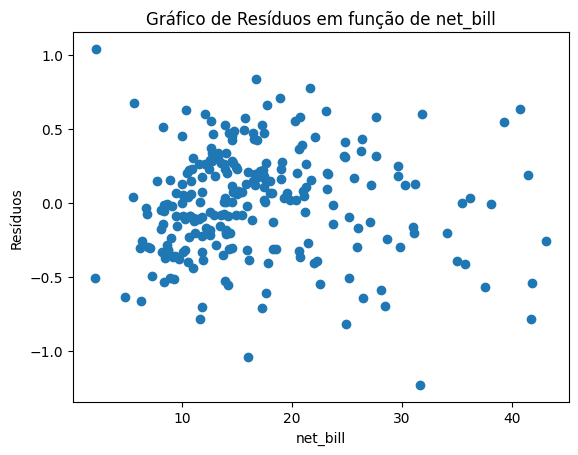

In [6]:
# Calcular o logaritmo de 'tip'
tips['log_tip'] = np.log(tips['tip'])

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a fórmula
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design e a matriz y
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Ajustar o modelo de regressão linear usando statsmodels
model = sm.OLS(y, X)
result = model.fit()

# Calcular os resíduos
residuals = result.resid

# Plotar os resíduos em relação a `net_bill`
plt.scatter(tips['net_bill'], residuals)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de net_bill')
plt.show()

In [7]:
# Calcular o logaritmo de 'tip'
tips['log_tip'] = np.log(tips['tip'])

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a fórmula
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design e a matriz y
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Modelos com diferentes transformações em net_bill
models = []

# Modelo com net_bill logarítmica
model_log = sm.OLS(y, X.assign(net_bill_log=np.log(tips['net_bill'])))
result_log = model_log.fit()
models.append(('Log', result_log))

# Modelo com net_bill polinomial
model_poly = sm.OLS(y, X.assign(net_bill_poly=tips['net_bill'] ** 2))
result_poly = model_poly.fit()
models.append(('Polynomial', result_poly))

# Avaliar os modelos
for model_name, result in models:
    print(f"Modelo: {model_name}")
    print(result.summary())
    print("=====================================================================")

# Escolher o melhor modelo com base no AIC
best_model = min(models, key=lambda x: x[1].aic)
print(f"Melhor modelo: {best_model[0]} (AIC = {best_model[1].aic})")

Modelo: Log
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     17.01
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.71e-18
Time:                        16:59:33   Log-Likelihood:                -93.421
No. Observations:                 244   AIC:                             202.8
Df Residuals:                     236   BIC:                             230.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0419      0.27

In [8]:
# Calcular a previsão de 'tip' usando o modelo polinomial
predictions_poly = result_poly.predict(X.assign(net_bill_poly=tips['net_bill'] ** 2))

# Calcular o R²
ssr_poly = ((predictions_poly - tips['tip']) ** 2).sum()
sst_poly = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()
r_squared_poly = 1 - (ssr_poly / sst_poly)

print("R² do modelo com net_bill polinomial:", r_squared_poly)

R² do modelo com net_bill polinomial: -1.912655455696004


In [9]:
# R² do modelo do item 1 (modelo com net_bill linear)
r_squared_linear = result.rsquared
print("R² do modelo com net_bill linear:", r_squared_linear)

R² do modelo com net_bill linear: 0.347084512528402


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [11]:
df = pd.read_csv('previsao_de_renda.csv').drop('Unnamed: 0', axis=1)
df.head(n=10)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


In [12]:
df[['renda', 'tempo_emprego']]

,renda,tempo_emprego
0,8060.34,6.602740
1,1852.15,7.183562
2,2253.89,0.838356
3,6600.77,4.846575
4,6475.97,4.293151
...,...,...
14995,7990.58,13.887671
14996,10093.45,NaN
14997,604.82,7.832877
14998,3352.27,4.298630


In [13]:
df.dropna(inplace=True)
X = df.drop(columns='renda', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['renda']

In [14]:
X

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,9968,True,True,0,28,7.183562,2.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4312,True,True,0,35,0.838356,2.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,10639,False,True,1,30,4.846575,3.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,7064,True,False,0,33,4.293151,1.0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,11477,True,False,0,32,9.849315,2.0,False,False,False,...,True,False,False,False,False,True,False,False,False,False
14995,16006,False,True,0,48,13.887671,1.0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
14997,6194,True,True,0,45,7.832877,2.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14998,4922,True,False,0,36,4.298630,2.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [16]:
arvore1 = DecisionTreeRegressor(max_depth=2)
arvore1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [17]:
RQ1 = arvore1.score(X_train, y_train)
print(f'R-quadrado: {arvore1.get_depth()} é {round((RQ1 * 100), 2)}')

R-quadrado: 2 é 27.89


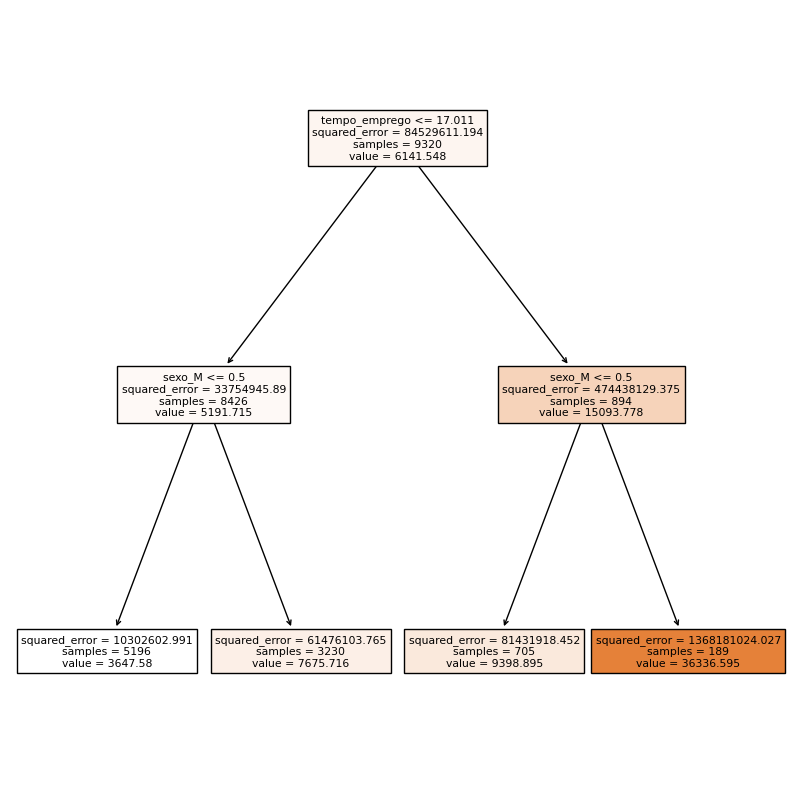

In [18]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore1,
                    feature_names=X.columns,
                    filled=True)

In [19]:
#arvore1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
#arvore1 = DecisionTreeRegressor(max_depth=2, random_state=100)

In [20]:
arvore1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, random_state=100)
arvore1.fit(X_train, y_train)

mse1 = arvore1.score(X_test, y_test)
mse1

0.2428880987294465

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888
3,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626
4,0.361798,0.361798,0.361798,0.361798,0.361798,0.361798,0.385601,0.385601
5,0.374194,0.375476,0.357639,0.357639,0.357639,0.355763,0.374003,0.372344
6,0.368211,0.370328,0.360468,0.362952,0.368094,0.361357,0.395262,0.395586
7,0.380633,0.372539,0.358316,0.366792,0.371188,0.366054,0.407731,0.408319
8,0.397917,0.363235,0.355316,0.367827,0.376935,0.379451,0.418946,0.415659


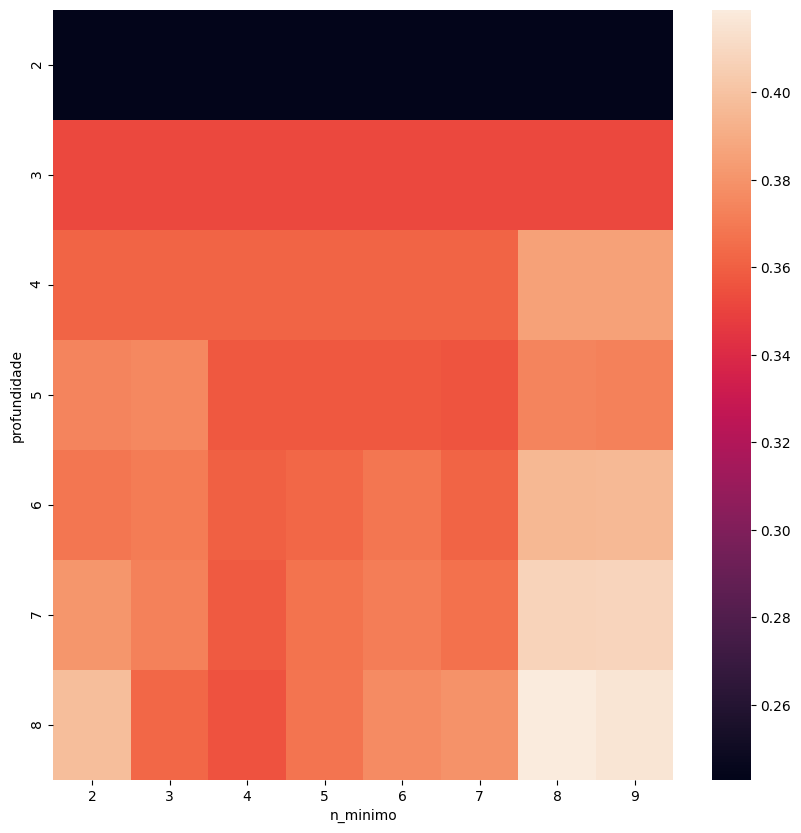

In [21]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9): # 1, 9
    for j in range(2, 10): # 5, 30
        arvore1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        arvore1.fit(X_train, y_train)
        mse1 = arvore1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [22]:
path = arvore1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.95238840e+02, 3.77481441e+02, 4.04082334e+02,
        6.58426830e+02, 1.34199851e+03, 1.36870524e+03, 1.48558492e+03,
        1.77288747e+03, 2.11885785e+03, 2.71916652e+03, 2.75141372e+03,
        2.77538060e+03, 3.03811531e+03, 3.21191699e+03, 4.04849532e+03,
        4.31298646e+03, 4.63518240e+03, 4.66909781e+03, 4.67490703e+03,
        4.73298053e+03, 4.88114732e+03, 5.09125778e+03, 5.21079441e+03,
        5.62246838e+03, 5.92566730e+03, 7.72435978e+03, 7.94788177e+03,
        7.98121227e+03, 8.13572245e+03, 8.31250524e+03, 8.74517022e+03,
        9.05197143e+03, 9.21740200e+03, 9.40340866e+03, 9.75188010e+03,
        1.03768440e+04, 1.13214739e+04, 1.36619311e+04, 1.43770283e+04,
        1.44676281e+04, 1.50607477e+04, 1.52532904e+04, 1.55402338e+04,
        1.59163762e+04, 1.62992083e+04, 1.64075498e+04, 1.69499081e+04,
        1.76212737e+04, 1.76346222e+04, 1.88528952e+04, 1.97511493e+04,
        1.98160807e+04, 1.98916835e+04, 2.07095347

Text(0, 0.5, 'Impureza total das folhas')

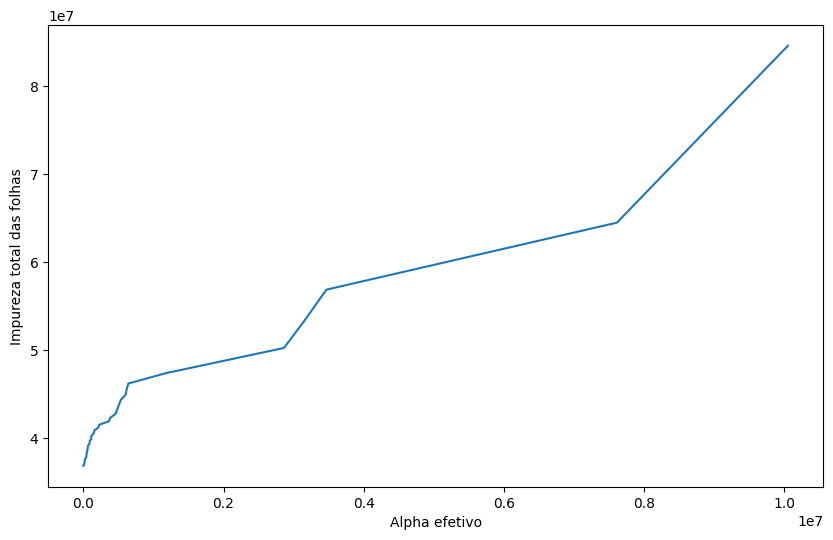

In [23]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [24]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

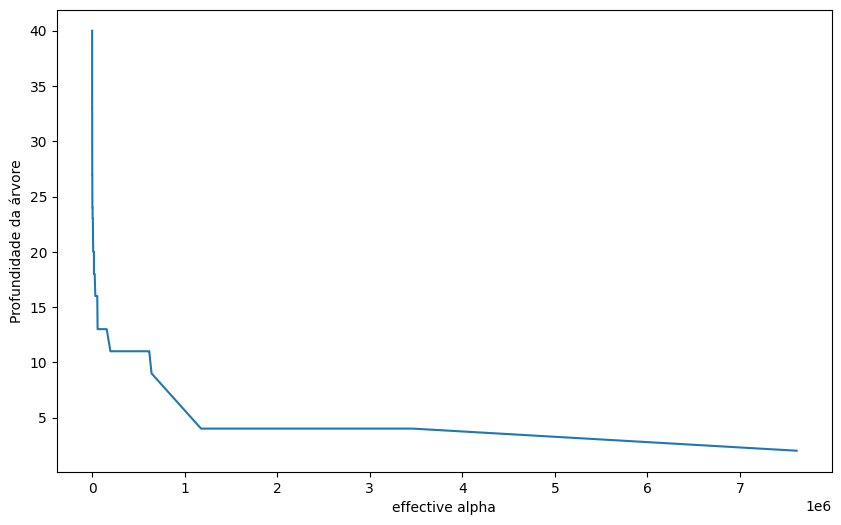

In [25]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

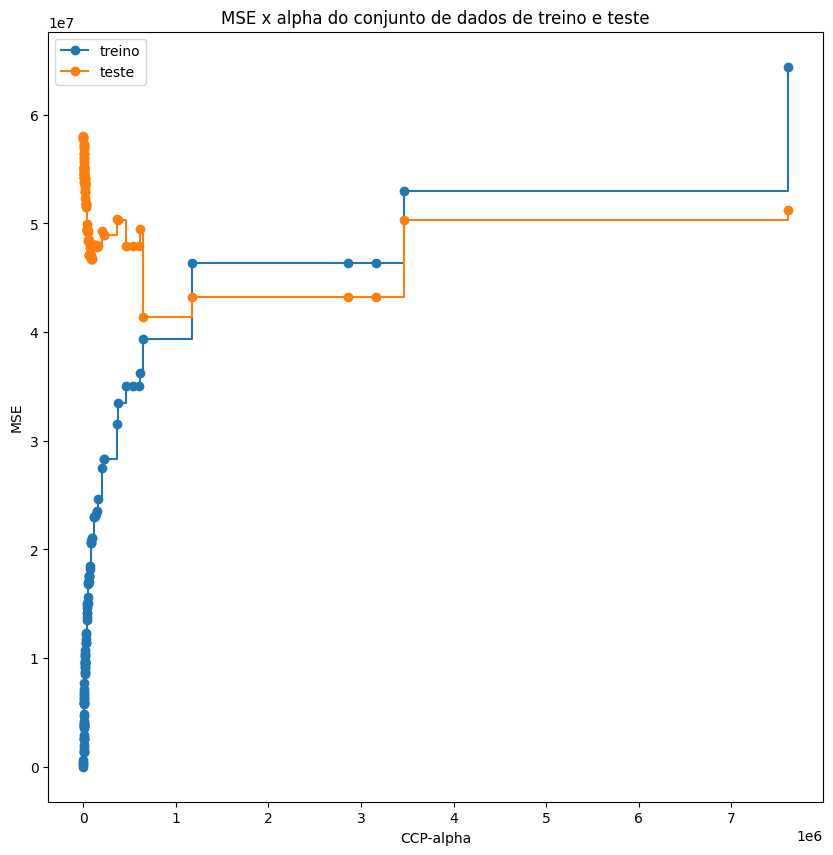

In [26]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("CCP-alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.01)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado: na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 40
R-quadrado: na base de testes: 0.07
MSE na base de testes: 58071644.06


In [28]:
arvore1 = DecisionTreeRegressor(max_depth=40, random_state=100)
arvore1.fit(X_train, y_train)

mse1 = arvore1.score(X_test, y_test)
mse2 = arvore1.score(X_train, y_train)

print(f'R-quadrado na árvore com profundidade {arvore1.get_depth()} para teste é {mse1}')
print(f'R-quadrado na árvore com profundidade {arvore1.get_depth()} para treino é {mse2}')

R-quadrado na árvore com profundidade 40 para teste é -0.010683213003669367
R-quadrado na árvore com profundidade 40 para treino é 1.0


---

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
# Carregar os dados do CSV para um DataFrame do Pandas
data = pd.read_csv('previsao_de_renda.csv').dropna()
data.dropna(inplace=True)
X = data[['tempo_emprego']] 
X = pd.get_dummies(X, drop_first=True)
y = data['renda']

# Verificar os primeiros registros do DataFrame para garantir que os dados foram carregados corretamente
print(data.head())

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

Erro médio quadrático (MSE): 49032239.60655531


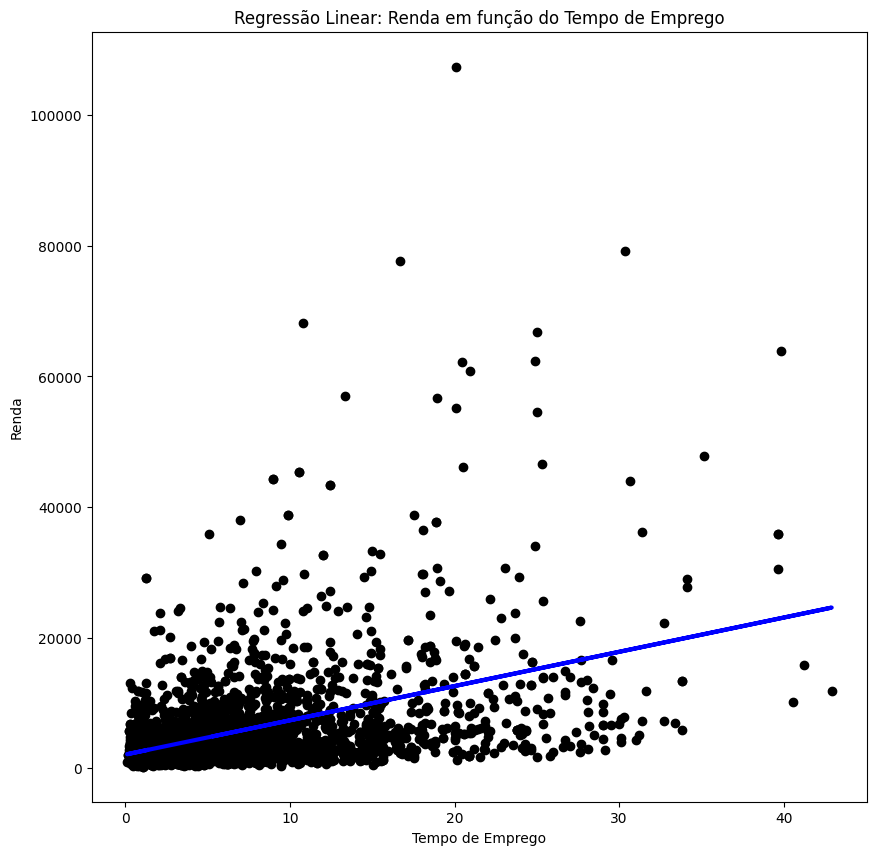

In [31]:
# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE) para avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print('Erro médio quadrático (MSE):', mse)

# Plotar os resultados da regressão
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Regressão Linear: Renda em função do Tempo de Emprego')
plt.show()

Erro médio quadrático (MSE): 49032239.60655531


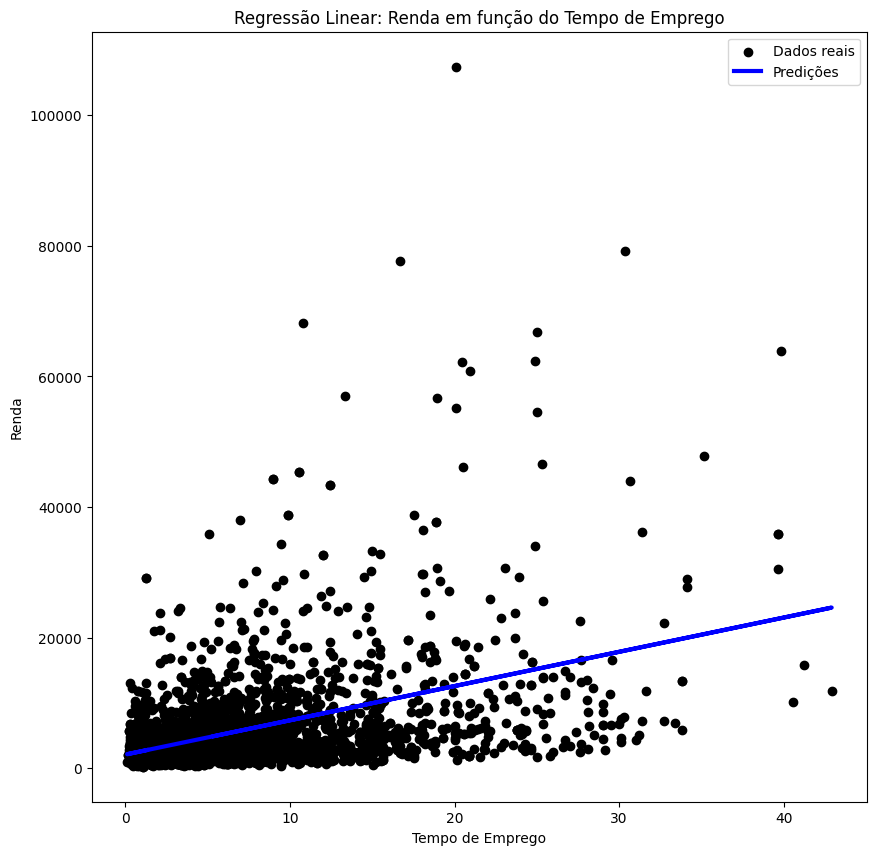

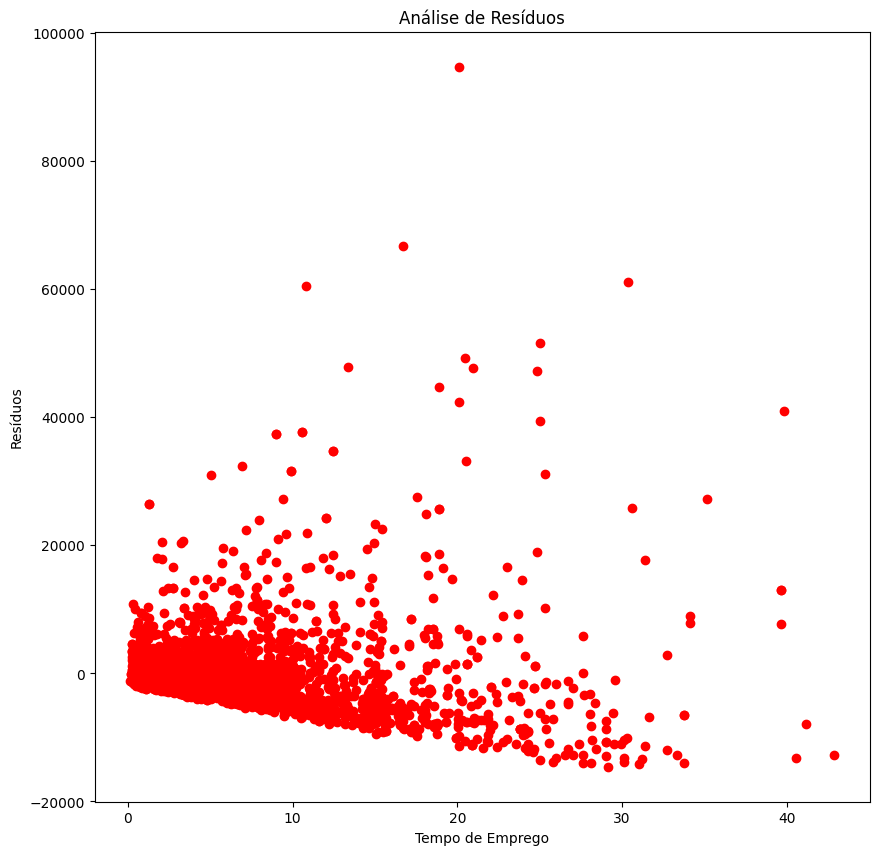

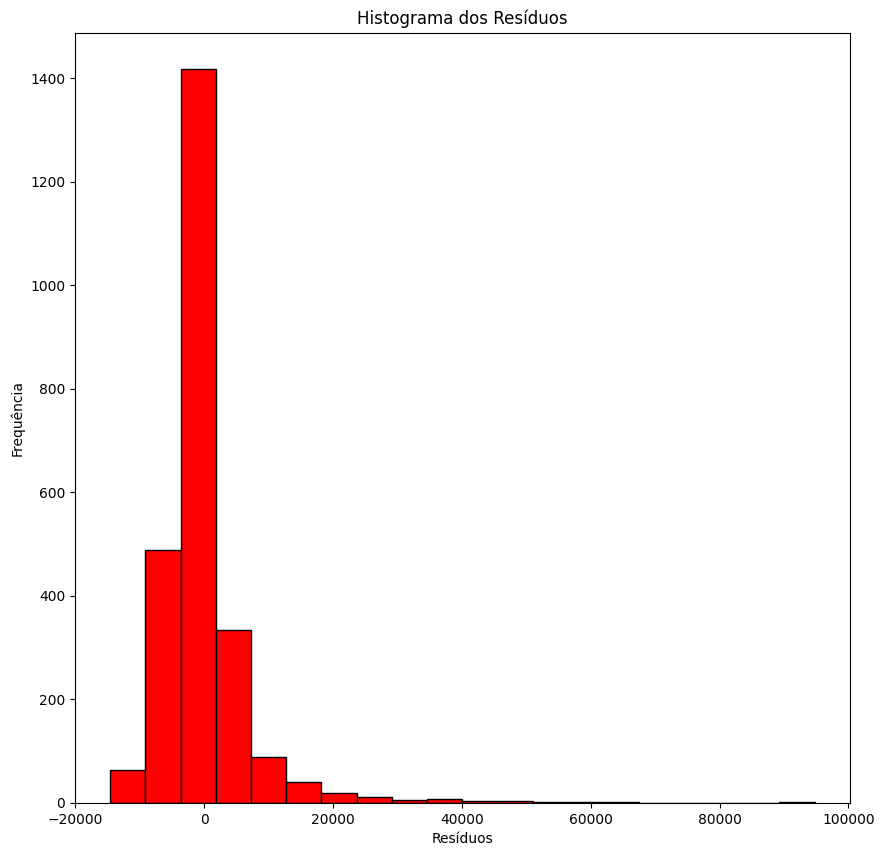

In [32]:
# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE) para avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print('Erro médio quadrático (MSE):', mse)

# Plotar os resultados da regressão
plt.scatter(X_test, y_test, color='black', label='Dados reais')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predições')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Regressão Linear: Renda em função do Tempo de Emprego')
plt.legend()
plt.show()

# Análise de resíduos
residuos = y_test - y_pred

# Plotar resíduos em relação a tempo_emprego
plt.scatter(X_test, residuos, color='red')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

# Plotar histograma dos resíduos
plt.hist(residuos, bins=20, color='red', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [33]:
# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE) para avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print('Erro médio quadrático (MSE):', mse)

# Coeficientes do modelo
print('Coeficientes:', model.coef_)

# Intercepto do modelo
print('Intercepto:', model.intercept_)

Erro médio quadrático (MSE): 49032239.60655531
Coeficientes: [524.49463232]
Intercepto: 2106.159875289551


In [34]:
# Adicionar intercepto ao conjunto de dados
X = sm.add_constant(X)

# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear múltipla com statsmodels
model = sm.OLS(y_train, X_train).fit()

# Imprimir o resumo estatístico do modelo para analisar os coeficientes e os valores-p
print(model.summary())

# Remover as variáveis não significantes (com valores-p > 0.05)
# Por exemplo, se o valor-p de uma variável for maior que 0.05, podemos considerá-la não significativa
variaveis_significativas = model.pvalues[model.pvalues < 0.05].index.tolist()

# Ajustar o modelo novamente apenas com as variáveis significantes
X_train_significativas = X_train[variaveis_significativas]
X_test_significativas = X_test[variaveis_significativas]

model_significativas = LinearRegression()
model_significativas.fit(X_train_significativas, y_train)

# Imprimir os coeficientes do modelo ajustado
print('Coeficientes:', model_significativas.coef_)
print('Intercepto:', model_significativas.intercept_)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1717.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:00:20   Log-Likelihood:            -1.0403e+05
No. Observations:                9941   AIC:                         2.081e+05
Df Residuals:                    9939   BIC:                         2.081e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2106.1599    129.654     16.245

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1717.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:00:20   Log-Likelihood:            -1.0403e+05
No. Observations:                9941   AIC:                         2.081e+05
Df Residuals:                    9939   BIC:                         2.081e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2106.1599    129.654     16.245

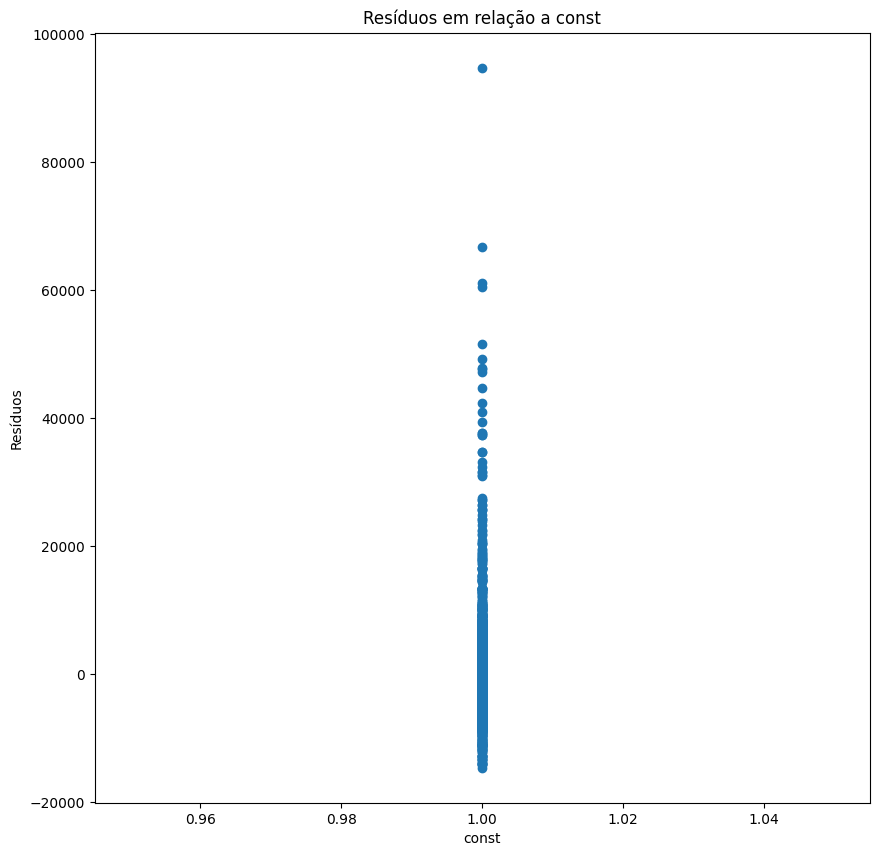

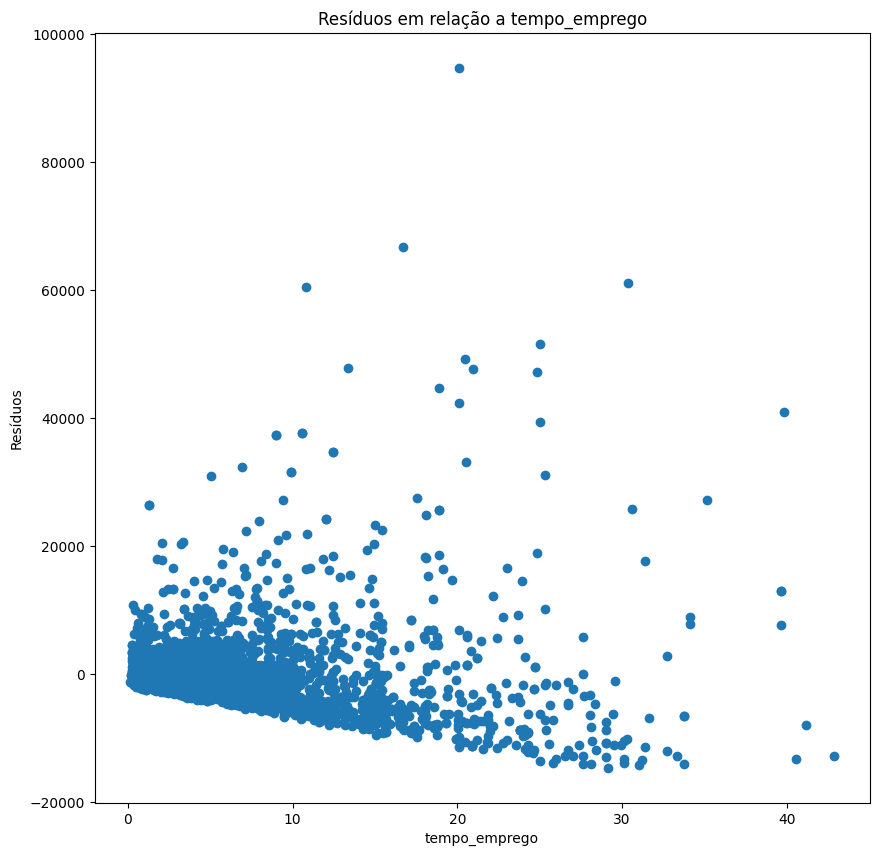

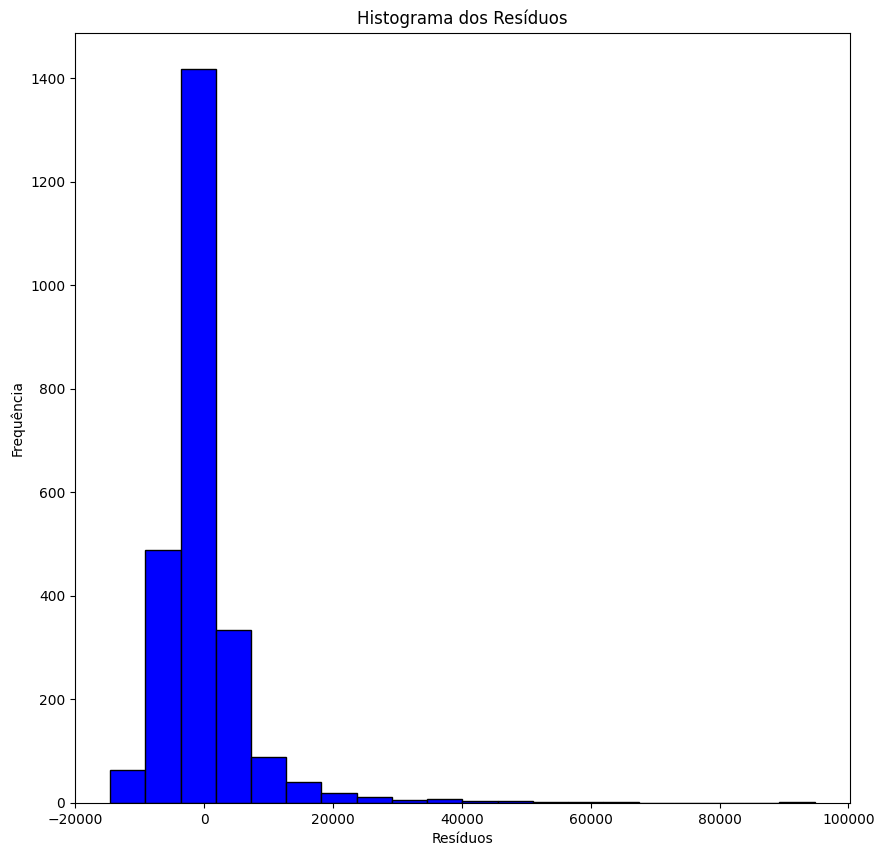

Erro médio quadrático (MSE): 49032239.60655531
Coeficiente de determinação (R²): 0.15229936040436753


In [35]:
# Adicionar intercepto ao conjunto de dados
X = sm.add_constant(X)

# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear múltipla com statsmodels
model = sm.OLS(y_train, X_train).fit()

# Imprimir o resumo estatístico do modelo para analisar os coeficientes e os valores-p
print(model.summary())

# Remover as variáveis não significantes (com valores-p > 0.05)
# Por exemplo, se o valor-p de uma variável for maior que 0.05, podemos considerá-la não significativa
variaveis_significativas = model.pvalues[model.pvalues < 0.05].index.tolist()

# Ajustar o modelo novamente apenas com as variáveis significantes
X_train_significativas = X_train[variaveis_significativas]
X_test_significativas = X_test[variaveis_significativas]

model_significativas = LinearRegression()
model_significativas.fit(X_train_significativas, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model_significativas.predict(X_test_significativas)

# Plotar os resíduos em relação às variáveis explicativas
residuos = y_test - y_pred
for variavel in X_train_significativas.columns:
    plt.scatter(X_test_significativas[variavel], residuos)
    plt.xlabel(variavel)
    plt.ylabel('Resíduos')
    plt.title('Resíduos em relação a ' + variavel)
    plt.show()

# Verificar a distribuição dos resíduos
plt.hist(residuos, bins=20, color='blue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

# Calcular o erro médio quadrático (MSE) para avaliar o modelo
mse = np.mean((y_pred - y_test)**2)
print('Erro médio quadrático (MSE):', mse)

# Calcular o coeficiente de determinação (R²) para avaliar o modelo
r2 = model_significativas.score(X_test_significativas, y_test)
print('Coeficiente de determinação (R²):', r2)